In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/Rekrutacja_2023/main/spaceship_titanic/dane.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Data preparation


In [7]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


some ideas for exploration:
1. extract the first character of cabin name and encode
2. find single passengers
3. create FamilySize feature
4. try to fill missing values in age column with randomly generated from first confidence interval (mean +- std)
5. create sex feature
6.

In [8]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

check for nan under entire dataframe

In [9]:
df.isnull().values.any()

True

amount of nan values


In [10]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
df_services = df[['RoomService',	'FoodCourt', 'ShoppingMall',	'Spa',	'VRDeck']]

handeling missing values

In [12]:
median_age = df.Age.median()
df.Age.fillna(median_age, inplace=True)
df.HomePlanet.fillna(df.HomePlanet.mode()[0], inplace=True)
df.CryoSleep.fillna(0, inplace=True)
df.Cabin.fillna('None', inplace=True)
df.Name.fillna('None', inplace=True)
df.Destination.fillna(df.Destination.mode()[0], inplace=True)
df.VIP.fillna(df.VIP.mode()[0], inplace=True)

# fill missing values of services with mean_of_all_services_for_one_person
mean_of_all_services_for_one_person = df_services.mean(axis=1)
for service_name in df_services:
    df[f'{service_name}'] = np.where(df[f'{service_name}'].isnull(), mean_of_all_services_for_one_person, df[f'{service_name}'])

In [13]:
df.iloc[[1367, 5039, 3287]]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1367,1439_02,Mars,False,D/52/S,TRAPPIST-1e,30.0,False,806.0,100.0,9.0,240.5,47.0,Croo Lette,False
5039,5388_01,Earth,True,G/871/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Stene Chaellerty,True
3287,3531_02,Mars,True,F/731/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Cinda Erflé,True


In [16]:
df.replace({False: 0, True: 1}, inplace=True)

In [17]:
cryosleep_true = df.loc[df.CryoSleep == True]['Transported']
rate_CryoSleep = sum(cryosleep_true) / len(cryosleep_true)
rate_CryoSleep

0.8175831412578202

81 proc ze wszystkich wprowadzonych w stan hibernacji dotarli do miejsca

In [18]:
df.loc[df.Transported == True]['HomePlanet']

1        Earth
4        Earth
5        Earth
6        Earth
7        Earth
         ...  
8684     Earth
8685    Europa
8687    Europa
8690     Earth
8692    Europa
Name: HomePlanet, Length: 4378, dtype: object

name


<Axes: ylabel='Transported'>

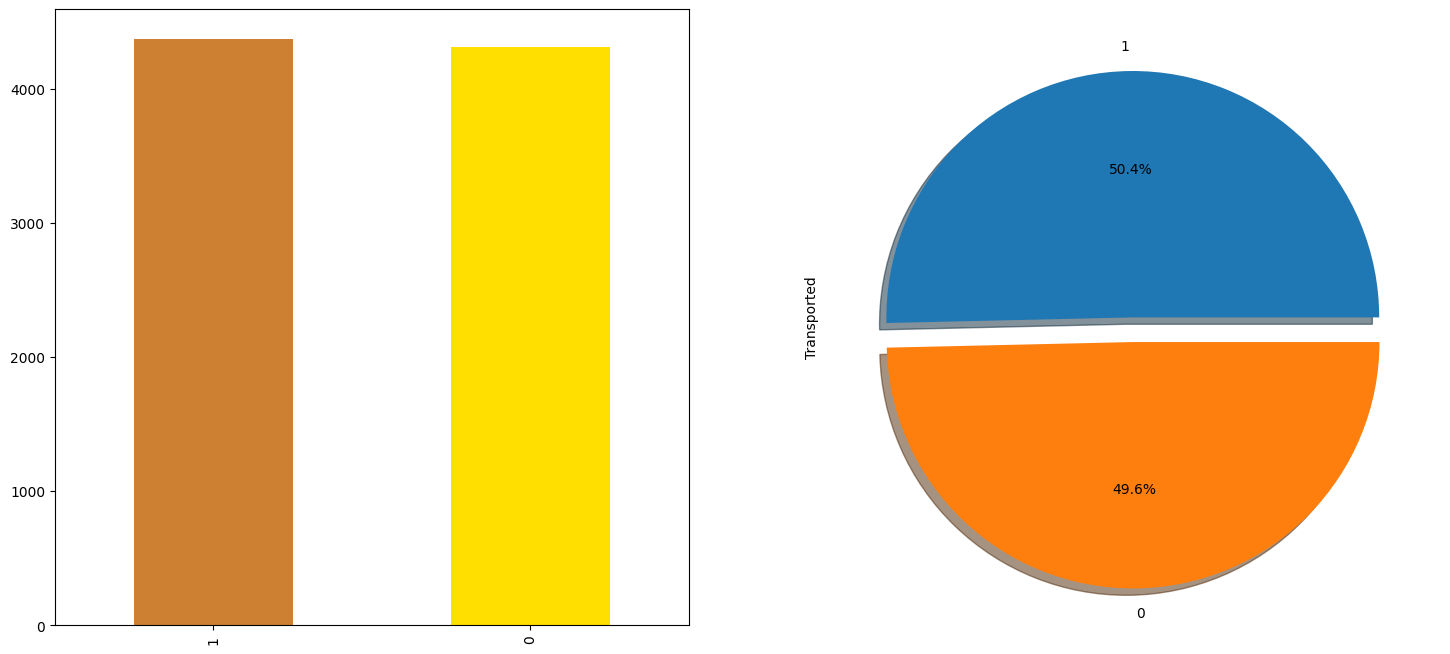

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Transported'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
df['Transported'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)

corr_matrix

<ipython-input-20-cca087fc75bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['PassengerId'], axis=1).corr(), \


<Axes: >

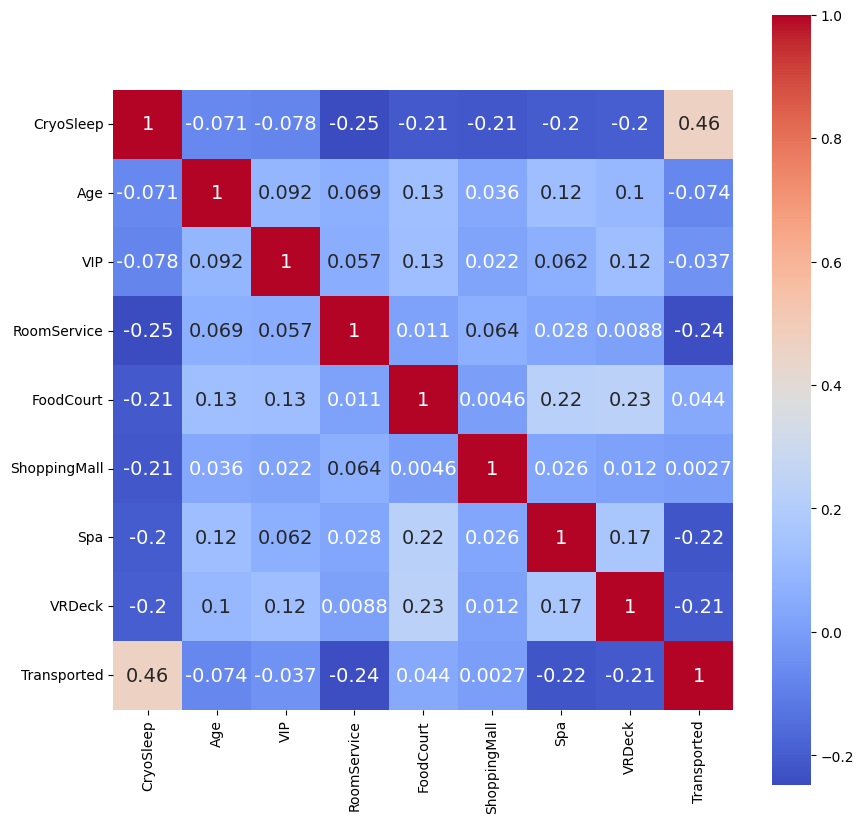

In [20]:
fig, axs = plt.subplots(figsize=(10, 10))
sns.heatmap(df.drop(['PassengerId'], axis=1).corr(), \
            annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

Age



In [24]:
df_corr_matrix = df.corr().abs().unstack().sort_values(ascending=False).reset_index()
df_corr_matrix.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr_matrix[df_corr_matrix['Feature 1'] == 'Age']

<ipython-input-24-8c0079e0f7e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_matrix = df.corr().abs().unstack().sort_values(ascending=False).reset_index()


,Feature 1,Feature 2,Correlation Coefficient
1,Age,Age,1.000000
33,Age,FoodCourt,0.128089
39,Age,Spa,0.122892
41,Age,VRDeck,0.101175
43,Age,VIP,0.091863
47,Age,Transported,0.074233
49,Age,CryoSleep,0.071323
52,Age,RoomService,0.069107
64,Age,ShoppingMall,0.035780


In [26]:
df.Age.isnull().sum()

0

destination

In [27]:
#df.Destination.nunique()
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [28]:
df.Destination.value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [29]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [30]:
df[df.Destination == 'TRAPPIST-1e']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,9275_01,Europa,0,A/97/P,TRAPPIST-1e,0.0,0,0.0,0.0,0.0,0.0,0.0,Polaton Conable,1
8686,9275_02,Europa,0,A/97/P,TRAPPIST-1e,32.0,0,1.0,1146.0,0.0,50.0,34.0,Diram Conable,0
8687,9275_03,Europa,0,A/97/P,TRAPPIST-1e,30.0,0,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,1
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1


In [31]:
#df[df.isna().any(axis=1)].sample(5)

In [32]:
#df2 = df.apply(lambda x: x['Col2'] if pd.isnull(x['Col1']) else x['Col1'], axis=1)

In [33]:
#df.iloc[1][['RoomService','FoodCourt','ShoppingMall',	'Spa','VRDeck']]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [34]:

df['services_percentile'] = pd.qcut(df_services.mean(axis=1), 13, duplicates='drop')
df['age_percentile'] = pd.qcut(df.Age, 13, duplicates='drop')

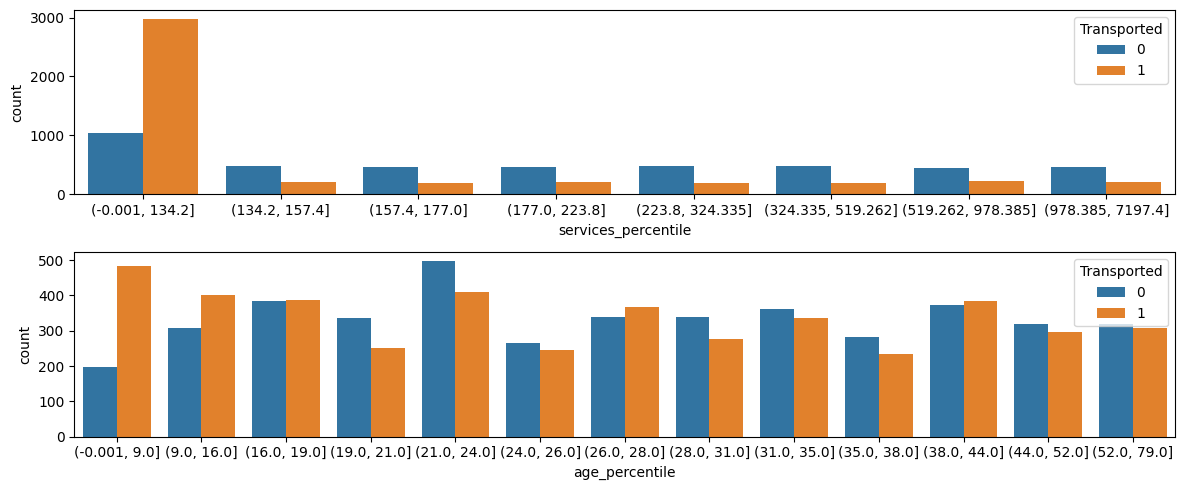

In [35]:
fig, axs = plt.subplots(nrows=2, figsize=(12,5))
sns.countplot(x='services_percentile', hue='Transported', data=df, ax=axs[0])
sns.countplot(x='age_percentile', hue='Transported', data=df, ax=axs[1])

fig.tight_layout()
plt.show()



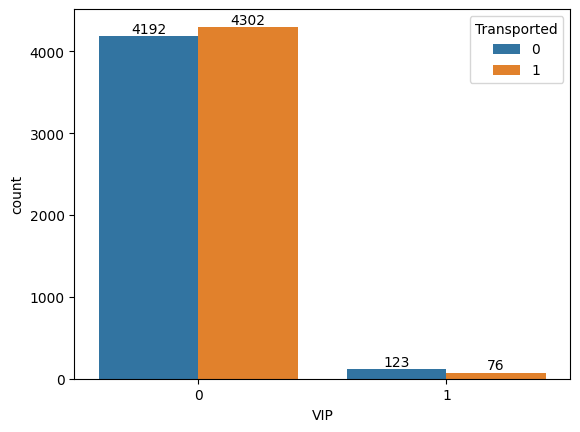

In [40]:
ax = sns.countplot(x='VIP', hue='Transported', data=df)
for container in ax.containers:
    ax.bar_label(container)

In [41]:
df.pivot_table(index="HomePlanet", values="Transported", aggfunc=['count', 'sum', 'mean']).style.background_gradient(vmin=0)

,count,sum,mean
,Transported,Transported,Transported
HomePlanet,,,
Earth,4803,2054,0.427649
Europa,2131,1404,0.658846
Mars,1759,920,0.523024


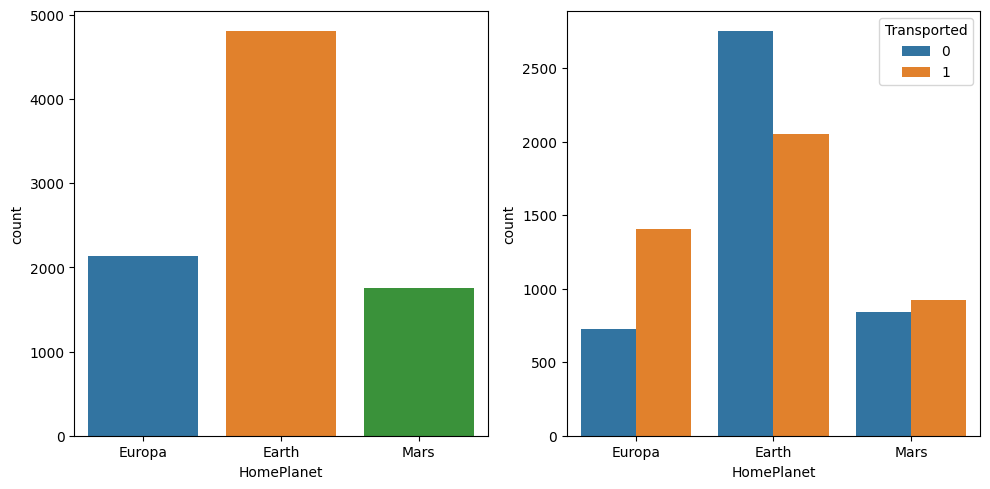

In [42]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x='HomePlanet', data=df, ax=axs[0])
sns.countplot(x='HomePlanet', hue='Transported', data=df, ax=axs[1])

fig.tight_layout()



encodin

In [43]:
df.dtypes

PassengerId              object
HomePlanet               object
CryoSleep                 int64
Cabin                    object
Destination              object
Age                     float64
VIP                       int64
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Name                     object
Transported               int64
services_percentile    category
age_percentile         category
dtype: object

In [44]:
df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
for col in df.columns[df.dtypes == object]:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [47]:
df.sample(10)


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,services_percentile,age_percentile
4334,2,0,2,28.0,0,0.0,79.0,2003.0,0.0,0.0,1,"(324.335, 519.262]","(26.0, 28.0]"
6338,1,0,2,0.0,0,0.0,0.0,0.0,0.0,0.0,1,"(-0.001, 134.2]","(-0.001, 9.0]"
8547,0,0,1,26.0,0,0.0,749.0,20.0,0.0,0.0,0,"(134.2, 157.4]","(24.0, 26.0]"
8173,0,0,2,27.0,0,22.0,226.0,0.0,0.0,633.0,0,"(157.4, 177.0]","(26.0, 28.0]"
7385,0,0,0,21.0,0,102.0,9.0,21.0,464.0,104.0,0,"(134.2, 157.4]","(19.0, 21.0]"
4406,0,0,2,38.0,0,183.0,203.0,0.0,110.0,374.0,0,"(157.4, 177.0]","(35.0, 38.0]"
7112,0,1,2,22.0,0,0.0,0.0,0.0,0.0,0.0,1,"(-0.001, 134.2]","(21.0, 24.0]"
6789,0,1,2,37.0,0,0.0,0.0,0.0,0.0,0.0,1,"(-0.001, 134.2]","(35.0, 38.0]"
7878,2,0,2,21.0,0,1214.0,179.0,566.0,644.5,619.0,0,"(519.262, 978.385]","(19.0, 21.0]"
2987,2,1,2,43.0,0,0.0,0.0,0.0,0.0,0.0,1,"(-0.001, 134.2]","(38.0, 44.0]"


In [48]:
df.drop(['services_percentile', 'age_percentile'], axis=1, inplace=True)

In [49]:
#ml algorithms

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import time

In [51]:
X = df.drop(['Transported'], axis=1)
y = df.Transported

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [87]:
MLA = [
     RandomForestClassifier(),

     LogisticRegressionCV(),

     KNeighborsClassifier(),

     SVC(probability=True),

     XGBClassifier()
    ]

In [70]:
params_dict = {
    'LogisticRegressionCV_grid' : {'penalty': ['l1','l2'],
           'Cs': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]},

'KNeighborsClassifier_grid' : {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]},

'SVC_grid' : {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']},

'RandomForestClassifier_grid' : {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]},

'XGBClassifier_grid' : {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}
}

In [88]:
#params_dict[f'{RandomForestClassifier().__class__.__name__}_grid']

In [89]:
import tensorflow as tf
tf.test.gpu_device_name()

bez cross validation aby szybko oszacowac jaka model jest najlepsza

In [ ]:
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)



i = 0
for alg in MLA:
    start = time.time()

    alg_name = alg.__class__.__name__
    MLA_compare.loc[i, 'MLA Name'] = alg_name

    clf = GridSearchCV(estimator=alg, param_grid=params_dict[f'{alg_name}_grid'], n_jobs=-1, cv=None)

    clf.fit(X_train, y_train)

    MLA_compare.loc[i, 'MLA Parameters'] = str(clf.best_params_)
    MLA_compare.loc[i, 'MLA Test Accuracy Mean'] = clf.score(X_test, y_test)

    stop = time.time()

    MLA_compare.loc[i, 'MLA Time'] = np.round((stop - start)/60, 2)
    i += 1

1) I can do another grid search with random forest classifier to find more specific parameteres
2) I didnt manage to grid search CSV (it was taking more then half an hour)

worth mentioning, that we can use accuracy as a metric
"The accuracy metric is best used in classification use cases with balanced data, meaning that the portion of classes is roughly the same. If the data is imbalanced or the number of classes is high, the accuracy score gets increasingly harder to interpret."

In [61]:
candidate_classifier = SVC()
candidate_classifier.fit(X_train, y_train)
y_predict = candidate_classifier.predict(X_test)

In [91]:
scv_accuracy = accuracy_score(y_test, y_predict)
scv_accuracy

0.8125359401955147

In [11]:
![scores.png](https://drive.google.com/uc?export=view&id=1PHqSIaFtkKiTTWZb2djM3gvGXKZns6WM)

/bin/bash: -c: line 1: syntax error near unexpected token `https://drive.google.com/uc?export=view'
/bin/bash: -c: line 1: `[scores.png](https://drive.google.com/uc?export=view&id=1PHqSIaFtkKiTTWZb2djM3gvGXKZns6WM)'


In [73]:
#df_pickle = MLA_compare.sort_values(by='MLA Test Accuracy Mean', ascending=False)

In [76]:
#df_pickle.to_pickle('models_scores.pkl')

In [6]:
#df_pickle = pd.read_pickle('models_scores.pkl')

In [7]:
#df_pickle.head()

In [92]:
scv_accuracy

0.8125359401955147

I'll choose scv model for predicitons